In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/creditcard.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

/tmp/ipykernel_8951/3824196861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, ax=axes[0, 0], palette="pastel")
/tmp/ipykernel_8951/3824196861.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1, 1], palette="pastel")


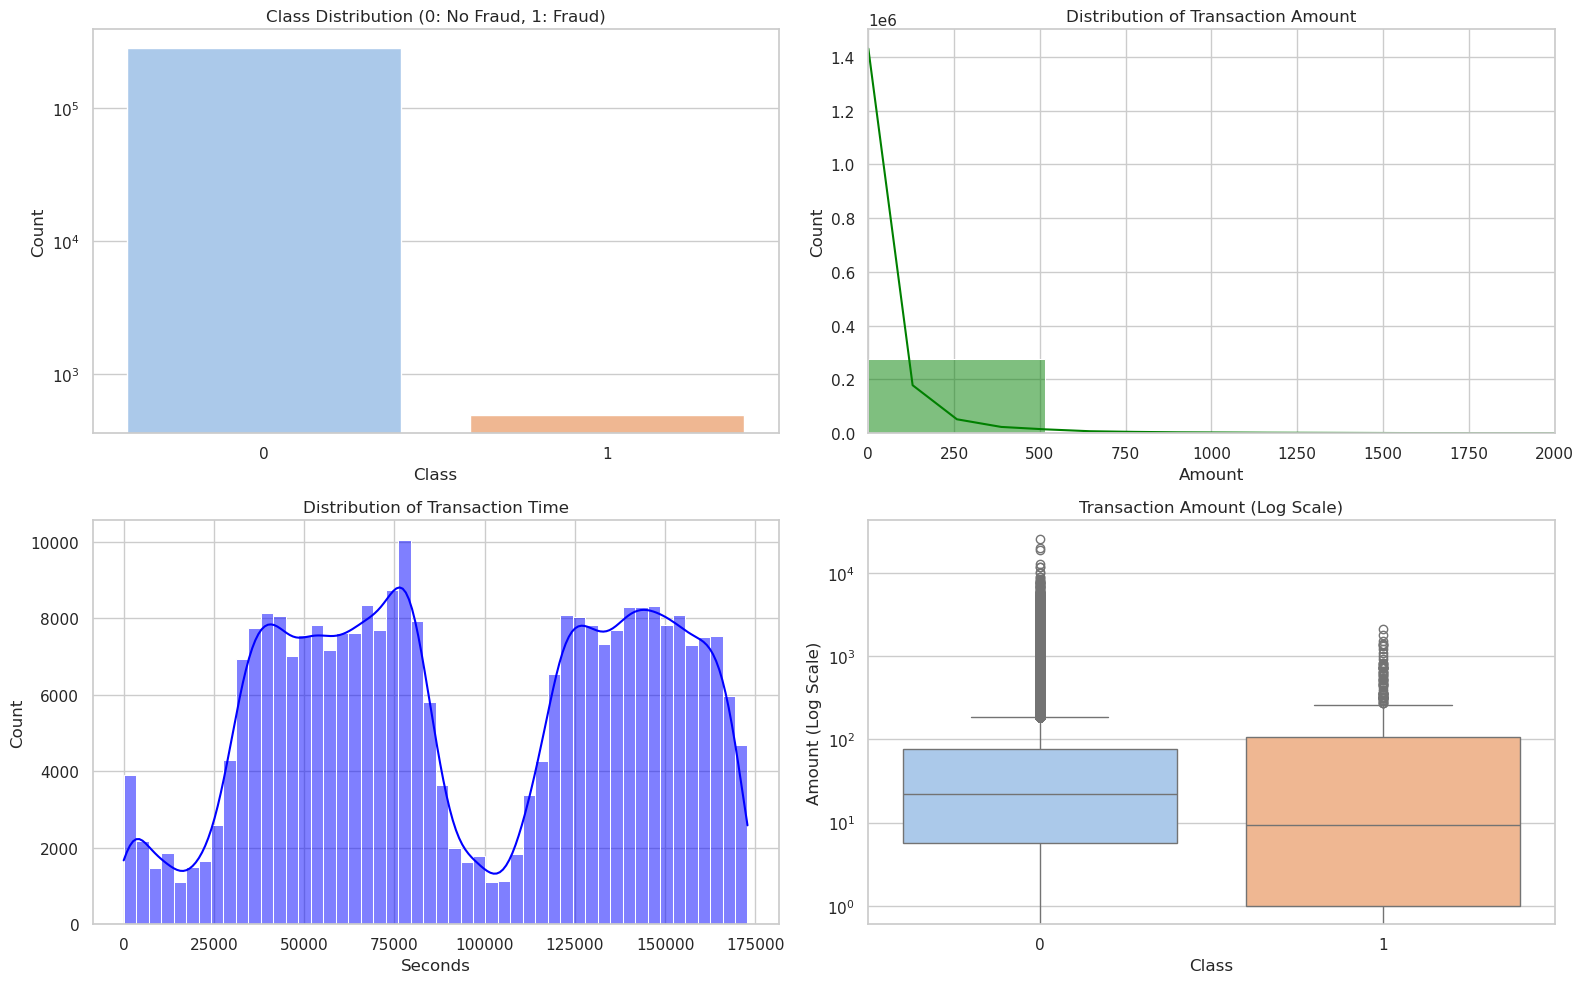

Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.countplot(x='Class', data=df, ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Class Distribution (0: No Fraud, 1: Fraud)')
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylabel('Count')

sns.histplot(df['Amount'], bins=50, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Distribution of Transaction Amount')
axes[0, 1].set_xlim(0, 2000)

sns.histplot(df['Time'], bins=50, ax=axes[1, 0], color='blue', kde=True)
axes[1, 0].set_title('Distribution of Transaction Time')
axes[1, 0].set_xlabel('Seconds')

sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1, 1], palette="pastel")
axes[1, 1].set_yscale("log")
axes[1, 1].set_title('Transaction Amount (Log Scale)')
axes[1, 1].set_ylabel('Amount (Log Scale)')

plt.tight_layout()
plt.show()

print("Class Counts:")
print(df['Class'].value_counts())
print("\nPercentage of Fraud:")
print(df['Class'].value_counts(normalize=True) * 100)